# NoShowAppointment Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset contains data of around 110k medical appointments and whether the patient showed up or not

> the data comes with a set of variables such as : Gender, neighbourhood, Age, along with patients medical record of chronic diseases such as : diabetes, and hypertension.

> so why 30% of the patients missed their scheduled appointment ?

In [1]:
# let’S import all the packages and data we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('no_show.csv')

<a id='wrangling'></a>
## Data Wrangling

### 1-Exploring data general features

In [3]:
# showing the first 5 rows of data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.shape
# (110527, 14)

(110527, 14)

### inspecting data typs, missing values and other info.

In [5]:
df.info()
# no nulls
# some data types needs fixing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### 2-fixing column names and fixing data types

In [6]:
# make columns lowercase for more easy exploring, and fixing typos
df.rename(columns = lambda x : x.lower(),inplace = True)
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [7]:
df.rename(columns={'handcap':'handicap'},inplace= True)

In [14]:
df.rename(columns = {'hipertension':'hypertension'},inplace = True)

In [15]:
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


### fixing the coding for no-show col to make it easier to understand

In [16]:
df.rename(columns = {'no-show':"showed"},inplace = True)
df['showed'] = df['showed'].apply(lambda x: x.lower().replace('no','1'))
df['showed'] = df['showed'].apply(lambda x: x.lower().replace('yes','0'))
df['showed'] = df['showed'].astype(int)
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1


### change data into datetime

In [17]:
df['appointmentday']=pd.to_datetime(df['appointmentday'], format = '%Y-%m-%d %H:%M:%S')
df['scheduledday']=pd.to_datetime(df['scheduledday'], format = '%Y-%m-%d %H:%M:%S')

In [18]:
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1


In [19]:
#rechecking for data info and types
df.info()
#all done

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   patientid       110527 non-null  float64            
 1   appointmentid   110527 non-null  int64              
 2   gender          110527 non-null  object             
 3   scheduledday    110527 non-null  datetime64[ns, UTC]
 4   appointmentday  110527 non-null  datetime64[ns, UTC]
 5   age             110527 non-null  int64              
 6   neighbourhood   110527 non-null  object             
 7   scholarship     110527 non-null  int64              
 8   hypertension    110527 non-null  int64              
 9   diabetes        110527 non-null  int64              
 10  alcoholism      110527 non-null  int64              
 11  handicap        110527 non-null  int64              
 12  sms_received    110527 non-null  int64              
 13  showed        

### 3- explore data with the statstics and further wrangling

In [20]:
# let’s explore data with statistics
df.describe()
# age appears to have a false value age = -1

,patientid,appointmentid,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.798067
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


#### fixing the false age

In [21]:
#detecting the false age
df.query('age == -1')

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,1


In [22]:
#deleting it
df.drop(index=99832,inplace=True)

In [23]:
df.query('age == -1')
# No false age entery

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed


#### checking for values

In [24]:
#checking for unique values
df.nunique()

patientid          62298
appointmentid     110526
gender                 2
scheduledday      103548
appointmentday        27
age                  103
neighbourhood         81
scholarship            2
hypertension           2
diabetes               2
alcoholism             2
handicap               5
sms_received           2
showed                 2
dtype: int64

> handicap appears to have more than 2 unique values which is inconsistent with the [data documentation](https://www.kaggle.com/datasets/joniarroba/noshowappointments)

In [25]:
df.handicap.value_counts()
# 2,3, and 4 should not be present

0    108285
1      2042
2       183
3        13
4         3
Name: handicap, dtype: int64

In [26]:
#dropping the wrong enteries
ind = df.query('handicap in [2,3,4]').index
df.drop(index = ind,inplace=True)

In [27]:
# false valued dropped
df.handicap.value_counts()

0    108285
1      2042
Name: handicap, dtype: int64

### 4- checking for duplicates


In [28]:
df.duplicated().sum()
#no duplicates

0

In [29]:
df.patientid.duplicated().sum()
# 48137 out of 110526

48137

> patientid appears to have some duplicate enteries, but it can be the same patient with different appointments, so we need to check for both patient id, appointment day columns

In [30]:
df[['patientid','appointmentday']].duplicated().sum()
# 8699 appears to have the same patientid and the the same appointment day

8699

In [31]:
df.drop_duplicates(['patientid','appointmentday'],inplace=True)
# drop duplicates

In [32]:
df[['patientid','appointmentday']].duplicated().sum()
#no duplicates

0

### making days_waited column 

In [33]:
df['days_waited']=(df['appointmentday'].dt.date-df['scheduledday'].dt.date).dt.days

In [34]:
# showing a sample to confirm results
df.sample(5)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed,days_waited
80008,2.116296e+11,5590254,M,2016-04-15 13:53:17+00:00,2016-05-06 00:00:00+00:00,22,SANTA LUÍZA,0,0,0,0,0,1,0,21
73958,1.592164e+13,5656870,F,2016-05-04 08:39:30+00:00,2016-05-10 00:00:00+00:00,0,SÃO PEDRO,0,0,0,0,0,1,1,6
75541,6.744824e+14,5656363,F,2016-05-04 07:58:17+00:00,2016-05-04 00:00:00+00:00,27,CONQUISTA,1,0,0,0,0,0,1,0
6247,4.589538e+14,5721565,M,2016-05-19 17:00:05+00:00,2016-05-25 00:00:00+00:00,85,JOANA D´ARC,0,0,0,0,0,1,1,6
65967,5.894585e+11,5606728,F,2016-04-20 10:37:13+00:00,2016-05-19 00:00:00+00:00,39,MARUÍPE,0,1,1,0,0,0,0,29


### dropping columns not used for our analysis

In [35]:
df.drop(['appointmentid','scheduledday'],axis=1,inplace=True)

In [36]:
df.drop(['appointmentday','patientid'],axis=1,inplace=True)

In [37]:
df.sample(5)

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed,days_waited
32095,M,70,MARIA ORTIZ,0,0,0,0,0,0,1,2
42887,F,0,TABUAZEIRO,0,0,0,0,0,0,1,0
74620,F,60,JARDIM CAMBURI,0,0,0,0,0,0,1,1
98245,F,0,MARIA ORTIZ,0,0,0,0,0,0,1,0
88582,M,37,UNIVERSITÁRIO,0,0,0,0,0,0,1,0


In [38]:
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed,days_waited
count,101628.000000,101628.000000,101628.000000,101628.000000,101628.000000,101628.000000,101628.000000,101628.000000,101628.000000
mean,37.043581,0.097650,0.197938,0.072332,0.027630,0.018066,0.335616,0.799396,10.288651
std,23.203174,0.296843,0.398447,0.259039,0.163912,0.133190,0.472208,0.400454,15.308813
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,15.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000


> days_waited have negative values that need to be dropped

In [39]:
#indexing the negative value
negative_days = df.query(' days_waited < 0').index

In [40]:
df.drop(index = negative_days, inplace = True)

In [41]:
#confirming
df.query(' days_waited < 0')
#no -ve values

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed,days_waited


# data wrangling summary

>changing the column names to lowercase and fixing typos

>false age value dropped, age == -1

>changed the structure of the appointmentday and scheduledday to datetime

>changed the coding for the last column to make it view show instead of no show

>deleting the unconsistent values from the handicap column

>made days_waited columns to explore later

>dropping duplicates from the patientid and appointmentday column

>dropping columns not needed for analysis

<a id='eda'></a>
## Exploratory Data Analysis

## overall show up vs no show

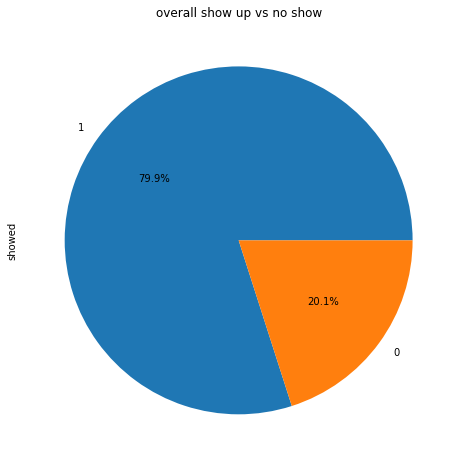

In [42]:
df.showed.value_counts().plot(kind="pie",figsize=(8,8),autopct='%1.1f%%');
plt.title('overall show up vs no show');

> the over all show up percent is 80%

## exploring the distribution of each variable

### using histograms for continous distrbution

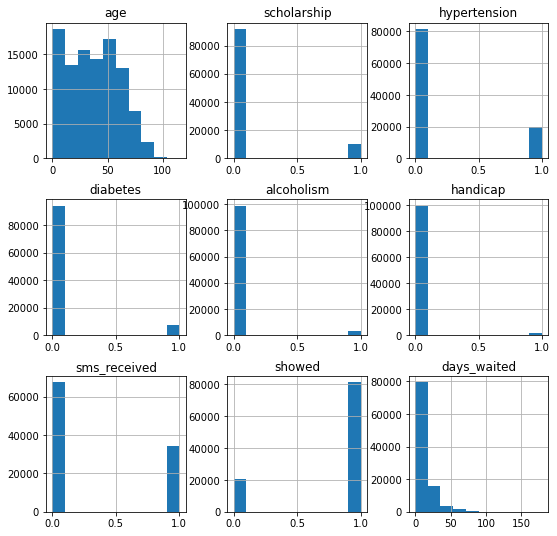

In [44]:
df.hist(figsize=(9,9));

## using box plots to detect outliers

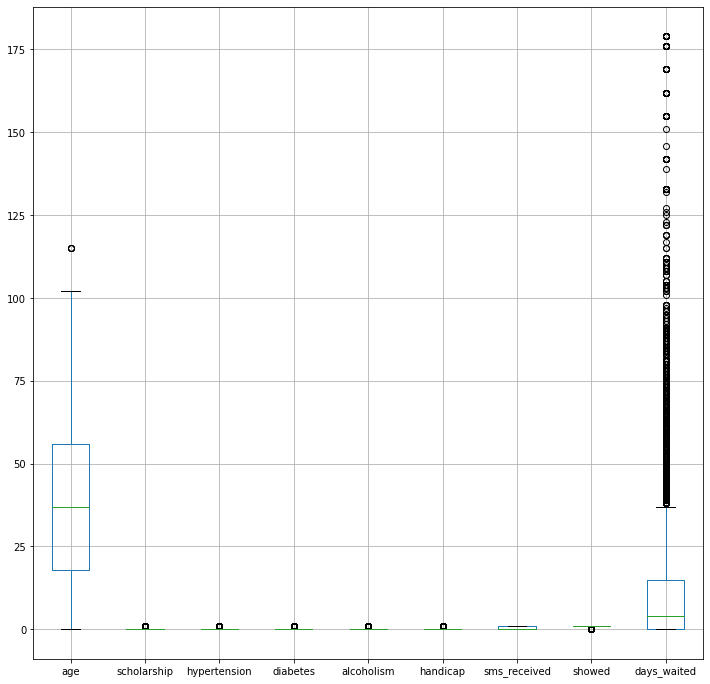

In [48]:
df.boxplot(figsize=(12,12));

In [49]:
#highest waiting period
df.days_waited.max()

179

In [85]:
#exploring raw data for high waiting periods
df.query('days_waited > 150')

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed,days_waited,age_group
3764,F,51,RESISTÊNCIA,0,0,0,0,0,1,1,176,adults
27390,M,52,SANTA CECÍLIA,0,1,0,0,0,1,0,155,adults
27391,M,48,TABUAZEIRO,0,0,0,0,0,0,1,162,adults
27392,M,68,MARUÍPE,0,0,0,0,0,1,1,169,seniors
27393,F,56,SANTA CECÍLIA,0,1,0,0,0,1,0,169,adults
27554,F,78,SÃO CRISTÓVÃO,0,0,0,0,0,0,0,162,seniors
27565,M,83,SANTA CECÍLIA,0,1,0,0,1,1,0,155,seniors
27566,M,49,SÃO CRISTÓVÃO,0,0,0,0,0,0,1,162,adults
27570,F,57,TABUAZEIRO,0,0,0,0,0,1,1,155,adults
27571,M,68,MARUÍPE,0,1,0,0,0,0,0,162,seniors


> days_waited appears to have the most amount of outliers from the rest of the variables, we can not remove them as there was people who showed even after 65 days, it may be due to long waiting lists and other variables that are not provided in our data

> the high waiting period above seems to come from common neighbourhoods, we can explore this further

# exploring neighbourhoods that have high waiting periods

In [93]:
area_wait = df.groupby('neighbourhood').days_waited.mean()

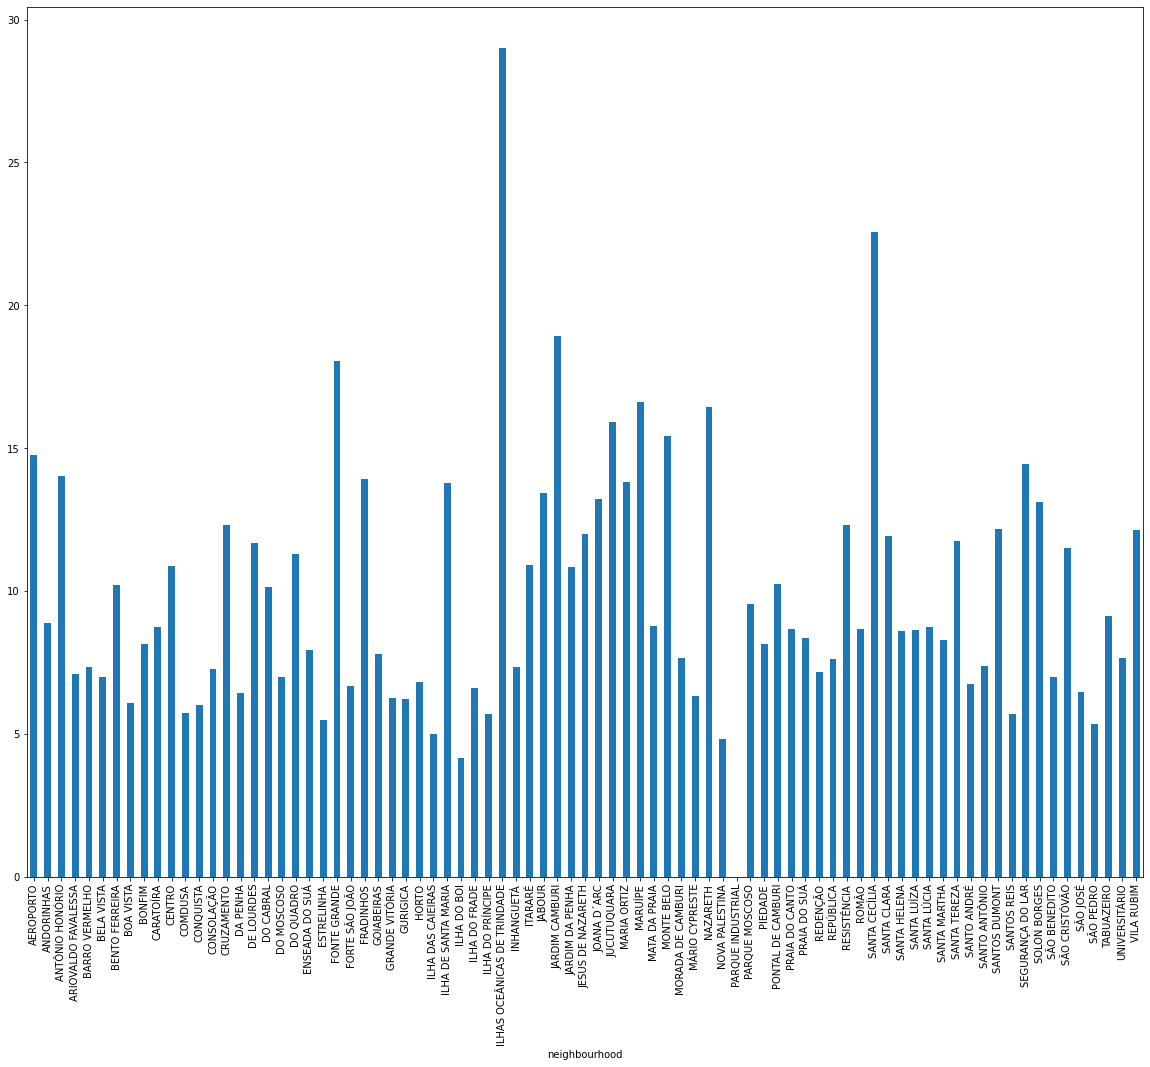

In [96]:
area_wait.plot(kind='bar',figsize=(20,16));

> the above chart shows some areas have higher than the average waiting period which is 10.28

### did certain neighbourhoods show lower ratings of  showing up ?

In [52]:
#group data by area and count patients in each one
area_count = df.groupby('neighbourhood').showed.count()

In [53]:
#number of people from each area who showed up
area_show = df.groupby('neighbourhood').showed.sum()

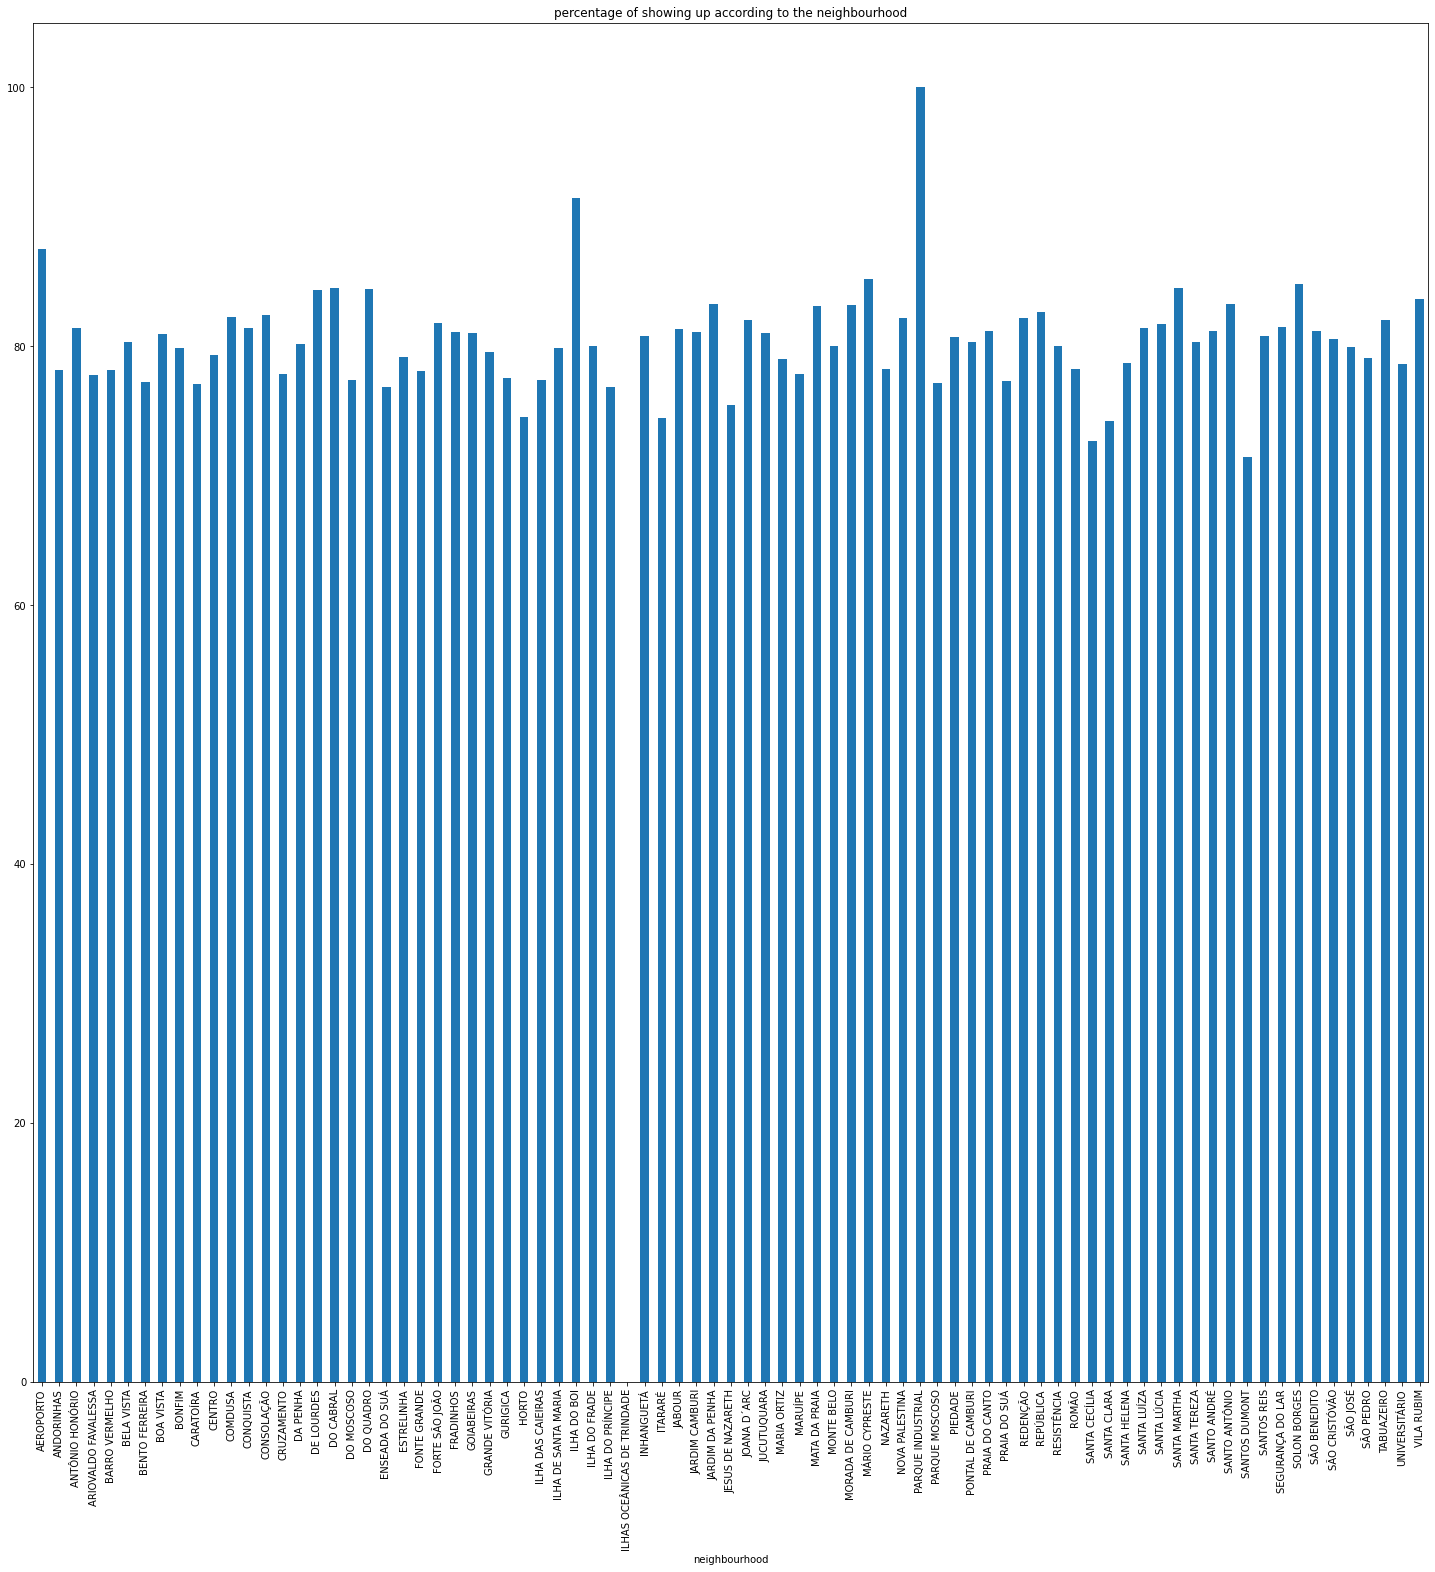

In [54]:
#dividing both values to get the percent of people who showed up from each area
percent_area_show =((area_show/area_count)*100).plot(kind="bar",figsize=(25,25),title="percentage of showing up according to the neighbourhood");

In [55]:
df.neighbourhood.unique()
#checking for areas names

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

>according to the above chart, neighbourhood does not show to be of an effective varibale, as most of the areas has nearby percentages of showing up to appointments, alot of factors can play into that, such as transport system, distrubtion of medical centers, we can not study those due to data limitations, so in conclusion neighbourhood alone can not be conclusive

###### one area showed zero show up rate which is ILHAS OCEÂNICAS DE TRINDADE
###### aonther one with 100 percent show up rate is PARQUE INDUSTRIAL

> exploring zero show up rate 

In [56]:
#furher exploring this area data
df.query('neighbourhood == "ILHAS OCEÂNICAS DE TRINDADE"')

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed,days_waited
48754,F,51,ILHAS OCEÂNICAS DE TRINDADE,0,0,0,0,0,0,0,29
48765,F,58,ILHAS OCEÂNICAS DE TRINDADE,0,0,0,0,0,0,0,29


> as per our data it appears we have only two patients from this area, both of them did not show up and both of them had the same waiting period for the appointment which is nearly a MONTH

> we will further explore this factor

###### exploring 100 percent show up

In [57]:
df.query('neighbourhood == "PARQUE INDUSTRIAL"')

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed,days_waited
75199,F,17,PARQUE INDUSTRIAL,0,0,0,0,0,0,1,0


> the data for PARQUE INDUSTRIAL shows only one patient who showed, and his appointment was at the same day, so there was no waiting period.
> we should explore this on a larger scale

# we will combine both our finidings from the correlation between areas and linger waiting periods, along with areas and the average show up

In [122]:
#create data set that shows both the average showin rate and avreage waiting days
avg_show_up = df.groupby('neighbourhood')[['days_waited','showed']].mean()

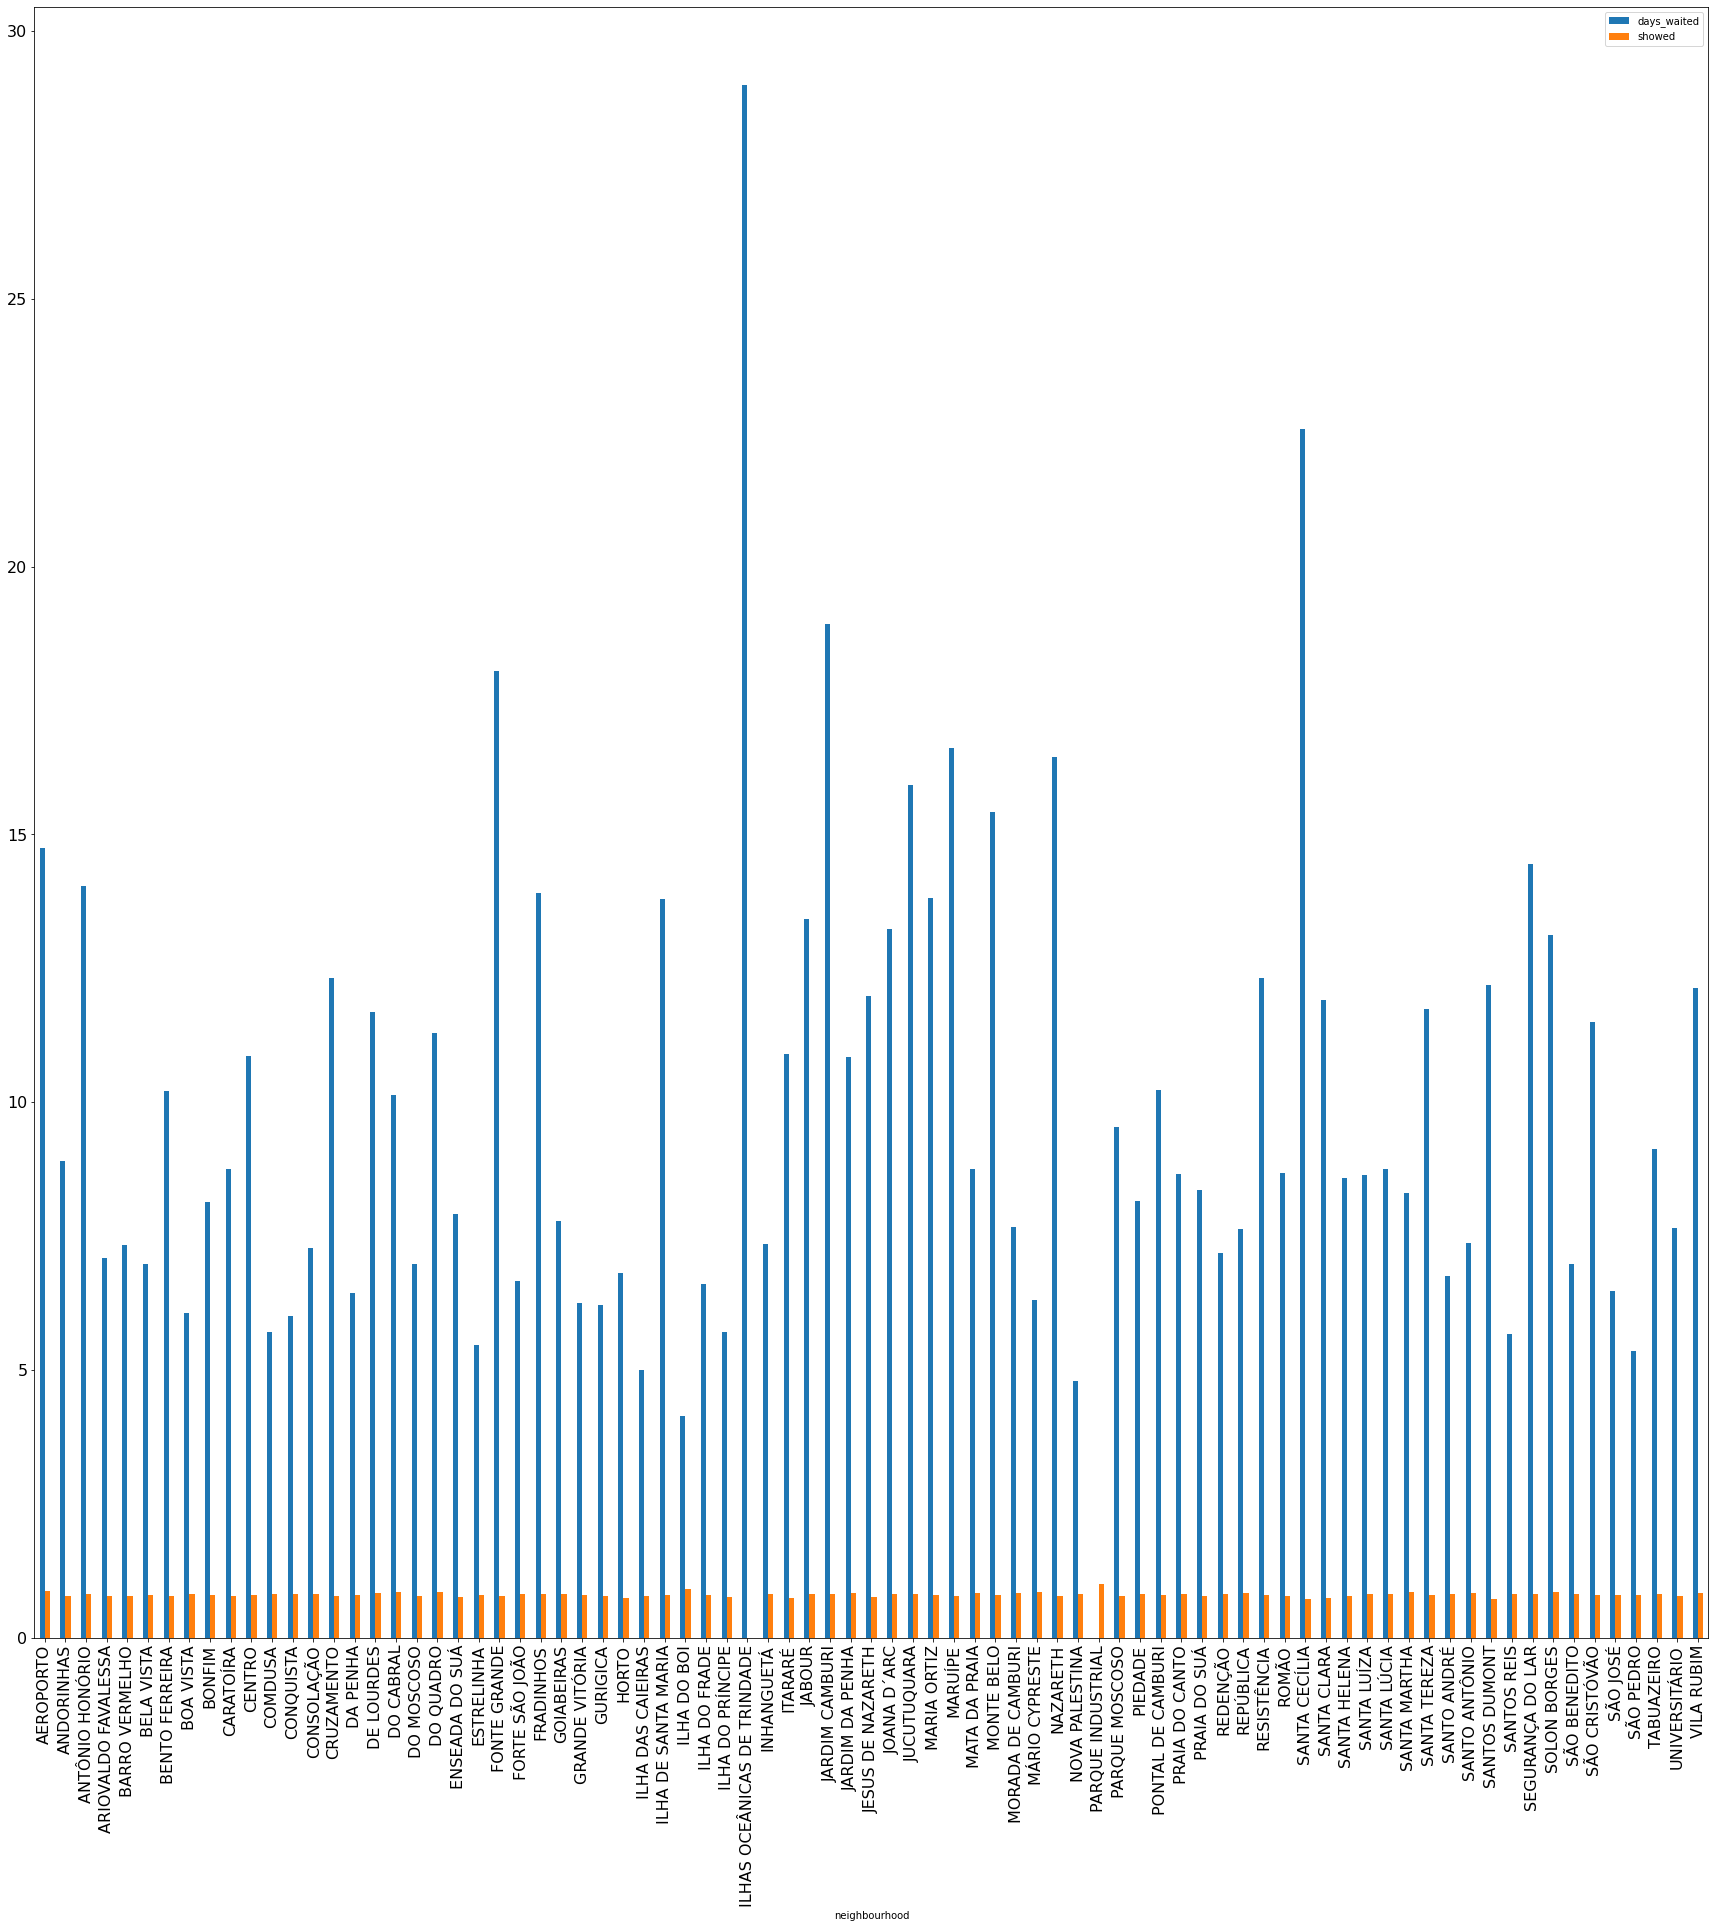

In [121]:
#visualisation
avg_show_up.plot(kind='bar',figsize=(30,30),fontsize=16);

> the neighbourhood that had the highest waiting period showed no show up rate, while the neighbourhood [PARQUE INDUSTRIAL] with no waiting period showed the highest show up rate, as it was discussed above in another chart, due to limitations of data; not many samples from the same area.

>> we can not be conclusive by just using to examples, as the other areas also showed nearby ratios of showing up

## did the number of days waited between schedule day and appointment day contribute to higher no show up rates  ?

In [58]:
#calculating the average of waiting peroid
avg_wait = df.days_waited.mean()

In [59]:
#dividng our data into above and below average waiting period
short_wait = df.query('days_waited <= {}'.format(avg_wait))
longer_wait = df.query('days_waited > {}'.format(avg_wait))

In [60]:
len(short_wait)+len(longer_wait) == len(df)
#confirming for no mistakes

True

In [61]:
#calculating the count for patients who waited below avg
short_wait.showed.count()
# 69718 patients

69718

In [62]:
#number of ppl who showed up with below avg
short_wait.query('showed == 1').showed.count()
# 59586 showed up out of 69718

59586

In [63]:
#calculating the count for patients who waited above avg
longer_wait.showed.count()
# 31906 patients

31906

In [64]:
#number of ppl who showed up with above avg
longer_wait.query('showed == 1').showed.count()
# 21655 showed out of 31906

21655

In [65]:
#calculating percentages for both
short_wait_percent=(short_wait.query('showed == 1').showed.count()/short_wait.showed.count())*100
longer_wait_percent=(longer_wait.query('showed == 1').showed.count()/longer_wait.showed.count())*100

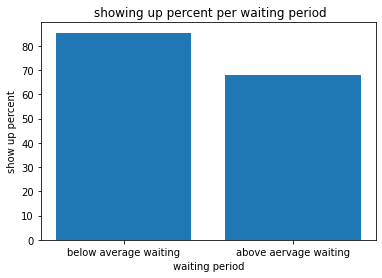

In [66]:
#visualisation
plt.bar(["below average waiting", "above aervage waiting"], [short_wait_percent,longer_wait_percent]);
plt.title(" showing up percent per waiting period");
plt.xlabel("waiting period");
plt.ylabel("show up percent");

In [67]:
print(short_wait_percent) # 85.46716773286668
print(longer_wait_percent) # 67.8712467874381

85.46716773286668
67.8712467874381


>#### from the chart above we can say that people who waited less than average were most likely to show up to the appointment ,with a show up percent of 85.5

>#### on the other hand people who waited more than average only had show up percent of 67.9

>#### so it’s safe to say that higher waiting period is associated with less show-up ratio

# people with chronic diseases vs people with no chronic disease : who is most likely to show up

In [68]:
# calculating the percent of people with chronic diseases who showed up
chronic_d_percent = (df.query('hypertension == 1 & diabetes == 1 & showed == 1').showed.count() / df.query('hypertension == 1 & diabetes == 1').showed.count())*100
# 82.66%

In [69]:
#calculating the percent of people with no chronic diseases who showed up
non_chronic_percent = (df.query('hypertension == 0 & diabetes == 0 & showed == 1').showed.count() / df.query('hypertension == 0 & diabetes == 0').showed.count())*100
# 79.18%

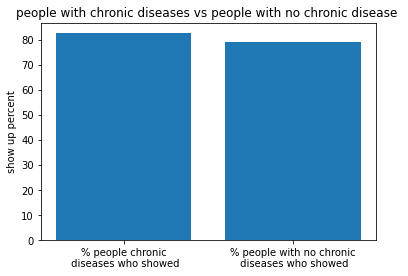

In [70]:
#visulaisation
plt.bar(["% people chronic\n diseases who showed", "% people with no chronic\n diseases who showed"], [chronic_d_percent,non_chronic_percent]);
plt.title("people with chronic diseases vs people with no chronic disease ");
plt.ylabel("show up percent");

> the chart shows no significant differences between the group who suffers from chronic conditions and the group with no chronic condition

> we can conclude that disease state does not contribute to showing up

# exploring the show up ratio of people with disablities vs people with no disabilities

In [71]:
#calculating the percentage of people with disabilities who showed up
handicap_percent = (df.query('handicap == 1 & showed == 1').showed.count() / df.query('handicap == 1').showed.count())*100
# 83.15%

In [72]:
non_handicap_percent = (df.query('handicap == 0 & showed == 1').showed.count() / df.query('handicap == 0').showed.count())*100
# 79.88%

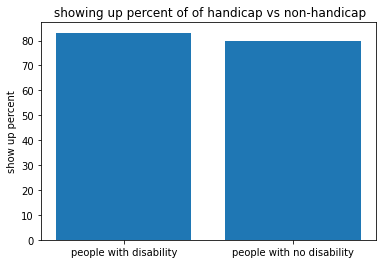

In [73]:
plt.bar(["people with disability", "people with no disability"], [handicap_percent,non_handicap_percent]);
plt.title(" showing up percent of of handicap vs non-handicap");
plt.ylabel("show up percent");

>> the chart and data above shows that there is no significant in commitment to appointment day in both of our observational groups

> from the data above; disease state, and disability did not show to be of a conclusive factor, however people with diabetes and hypertension, and people with disabilities showed higher rate of commitment but not high enough to be significant

# explore showing up in different age groups

In [74]:
# View the min, 25%, 50%, 75%, max age values with  describe
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed,days_waited
count,101624.000000,101624.000000,101624.000000,101624.000000,101624.000000,101624.000000,101624.000000,101624.000000,101624.000000
mean,37.044192,0.097654,0.197945,0.072335,0.027631,0.018047,0.335629,0.799427,10.289095
std,23.203322,0.296848,0.398453,0.259044,0.163915,0.133122,0.472212,0.400431,15.308951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,15.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000


In [75]:
# Bin edges that will be used to "cut" the data into groups
bin = [0,15,25,64,115]

In [76]:
#labels for age groups
age_groups=["children",' youth',"adults ","seniors"]

In [77]:
# Creates age_group column
df['age_group'] = pd.cut(df['age'], bin, labels=age_groups)

In [78]:
#check for the creation of the column
df.sample(3)

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed,days_waited,age_group
97857,F,1,SÃO JOSÉ,0,0,0,0,0,1,0,28,children
21856,F,80,MARUÍPE,0,1,1,0,0,1,1,7,seniors
48958,M,38,MATA DA PRAIA,0,0,0,0,0,0,1,0,adults


In [79]:
# calculate numbers of people per age group
age_count = df.groupby("age_group").showed.count()

In [80]:
# calculate numbers of people who showed up per group
age_show = df.groupby('age_group').showed.sum()

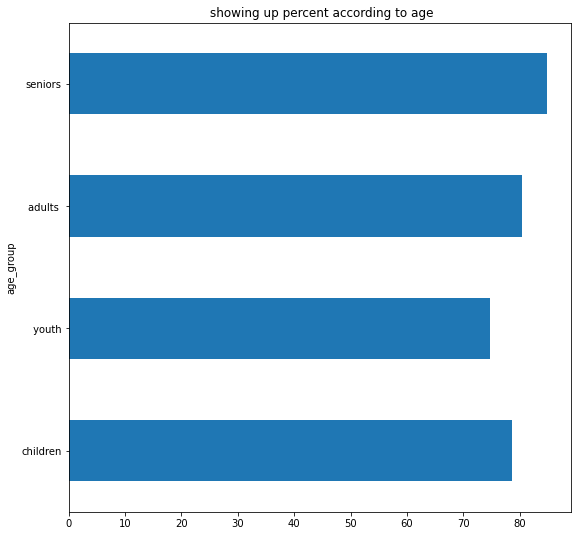

In [81]:
# visualisation of the results
((age_show / age_count)*100).plot(kind="barh",title=" showing up percent according to age",figsize=(9,9));

> senoirs appear to have the highest showing percent among other groups,while youth was the least

> the difference between age groups is not remarkable

# show up of men vs women

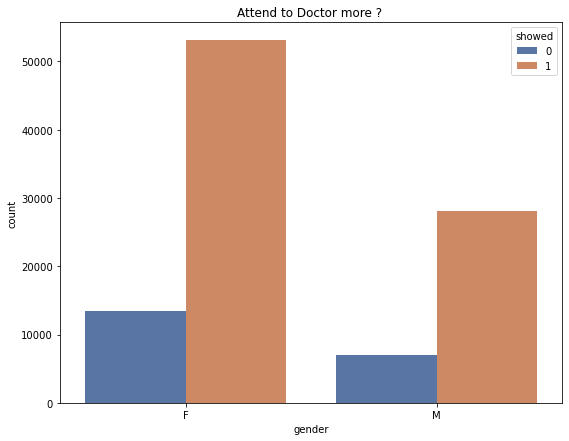

In [82]:
plt.figure(figsize=(9,7))
sns.countplot(data=df,x="gender",hue="showed",palette="deep")
plt.title("Attend to Doctor more ? ");

> the above chart shows that women were to attend their appointments more than men

In [83]:
df.query('gender== "F"').days_waited.mean()
# aveage waiting period for women == 10.568250150330728

10.568250150330728

In [84]:
df.days_waited.mean()
# average waitng period == 10.289095095646697

10.289095095646697

> despite women having  higher average waiting period than the the average, which proved to be a factor correlated with showing up, women still showed up more than men

<a id='conclusions'></a>
## Conclusions

>  neighbourhood does not show to be of an effective varibale, as most of the areas has nearby percentages of showing up to appointments, a lot of factors can play into that, such as transport system, distrubtion of medical centers, we can not study those due to data limitations, so in conclusion neighbourhood alone can not be conclusive

> people who waited less than average were most likely to show up to the appointment ,with a show up percent of 85.5
on the other hand people who waited more than average only had show up percent of 67.9
so it’s safe to say that higher waiting period is associated with less show-up ratio

> no significant differences between the group who suffers from chronic conditions and the group with no chronic condition
we can conclude that disease state does not contribute to showing up, however people with chronic illnes showed up more than our chronic diseases-free group

> there is no significant in commitment to appointment day in both of our observational groups, however
 people with disabilities showed higher rate of commitment but not high enough to be significant
 
> senoirs appear to have the highest showing percent among other groups,while youth was the least
the difference between age groups is not remarkable

> women were to attend their appointments more than men

> despite women having average waiting period than the the average, which proved to be a factor correlated with showing up, women still showed up more than men











# limitations

> the data does not show multiple variables as patient denisty to the whole population in certain areas which can answer why we are having 179 waiting days, and to take actions regarding those outliers


> the alcholism column shows that children below 14 have alcholism, we can not know if those enteries are vaild through the whole column on how they assess alcholism.


> the scholarship system from the documentation is not an indicator for the educational and awarness status of the group, another data on higher level of eucation would have served the research better


> covering more than one country could have made the research better by being inclusive on more than population and their characterstics, in this way discussing factors like the effects of diseases and other factors could have been more unbiased and more conclusive


> marital, employment status would have been a good variables to include


> expand the data on the number of medical center in each neighbourhood, could helped us to assess if the patient denisty were an affecting factor


> data samples is limited in some areas, we could use more samples from this to be more representitive